In [48]:
import sunpy.map
from astropy.coordinates import SkyCoord

aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 

In [49]:
aia_coord = aia_map.observer_coordinate
aia_coord_xyz = SkyCoord(aia_coord, representation_type='cartesian')
aia_coord_xyz

<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=696000.0 km): (x, y, z) in m
    (1.51521828e+11, 33538843.27385139, 1.26549339e+10)>

In [50]:
ac_x = aia_coord_xyz.x
ac_y = aia_coord_xyz.y
ac_z = aia_coord_xyz.z

In [51]:
from sunpy.coordinates import Heliocentric
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

r_1 = const.R_sun
lat = -14*u.deg
lon = 91*u.deg

In [52]:
from sunpy.coordinates import frames

time = aia_map.reference_coordinate.obstime
hgs_frame = frames.HeliographicStonyhurst(obstime=time)

hcc_frame = Heliocentric(observer=SkyCoord(
    lon=lon, lat=lat, radius=r_1, frame='heliographic_stonyhurst'))

# lon, lat, radius
loop_coord = SkyCoord(lon=lon, lat=lat, radius=r_1, frame=hgs_frame)  # longitude, latitude, and distance from the origin
loop_coord_xyz = SkyCoord(loop_coord, representation_type='cartesian')
loop_coord_xyz

<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
    (-11780980.58539838, 6.74931926e+08, -1.68305063e+08)>

In [53]:
lp_x = loop_coord_xyz.x
lp_y = loop_coord_xyz.y
lp_z = loop_coord_xyz.z

In [54]:
# import numpy

# unit = u.AU
# range = numpy.array([0,1,2,3,4,5,6]) / 1e3

# x = range * unit
# y = range * unit
# z = range * unit

# hcc_frame = Heliocentric(observer=SkyCoord(
#     lon=lon, lat=lat, radius=r_1, frame='heliographic_stonyhurst'))
# line = SkyCoord(x=x, y=y, z=z, frame=hcc_frame).transform_to('heliographic_stonyhurst')


In [55]:
x = [ac_x, lp_x]
y = [ac_y, lp_y]
z = [ac_z, lp_z]

hcc_frame = Heliocentric(observer=SkyCoord(
    lon=lon, lat=lat, radius=r_1, frame='heliographic_stonyhurst'))
line = SkyCoord(x=x, y=y, z=z, frame=hcc_frame).transform_to('heliographic_stonyhurst')


In [56]:
import sunpy.map

aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 

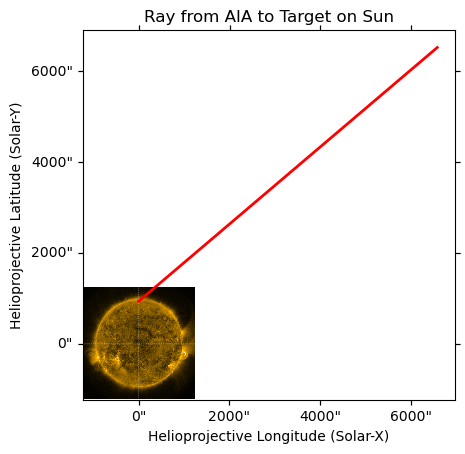

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
line = ax.plot_coord(line.transform_to(aia_map.coordinate_frame), color='r', lw=2)


ax.set_title("Ray from AIA to Target on Sun")
plt.show()